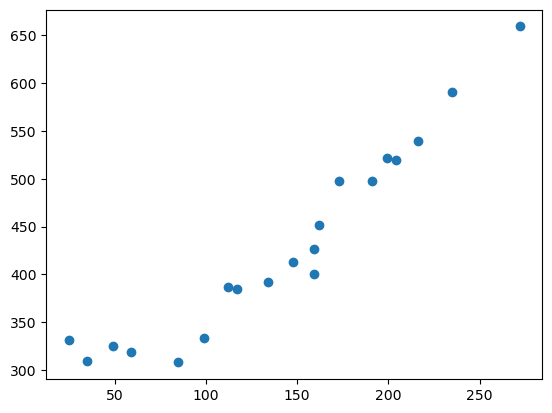

第1次 ： theta0 = 8.813, theta1 = 1.955, 差值 = 74927.3021
第2次 ： theta0 = 17.247, theta1 = 3.214, 差值 = 71994.2365
第3次 ： theta0 = 25.512, theta1 = 4.462, 差值 = 69176.6933
第4次 ： theta0 = 33.612, theta1 = 5.697, 差值 = 66470.1093
第5次 ： theta0 = 41.550, theta1 = 6.922, 差值 = 63870.1020
第6次 ： theta0 = 49.329, theta1 = 8.135, 差值 = 61372.4620
第7次 ： theta0 = 56.952, theta1 = 9.337, 差值 = 58973.1464
第8次 ： theta0 = 64.423, theta1 = 10.527, 差值 = 56668.2724
第9次 ： theta0 = 71.744, theta1 = 11.707, 差值 = 54454.1106
第10次 ： theta0 = 78.920, theta1 = 12.876, 差值 = 52327.0790
第11次 ： theta0 = 85.951, theta1 = 14.034, 差值 = 50283.7376
第12次 ： theta0 = 92.842, theta1 = 15.181, 差值 = 48320.7820
第13次 ： theta0 = 99.595, theta1 = 16.318, 差值 = 46435.0388
第14次 ： theta0 = 106.213, theta1 = 17.444, 差值 = 44623.4600
第15次 ： theta0 = 112.699, theta1 = 18.559, 差值 = 42883.1181
第16次 ： theta0 = 119.055, theta1 = 19.665, 差值 = 41211.2012
第17次 ： theta0 = 125.284, theta1 = 20.760, 差值 = 39605.0089
第18次 ： theta0 = 131.388, theta1 = 21.845, 差值

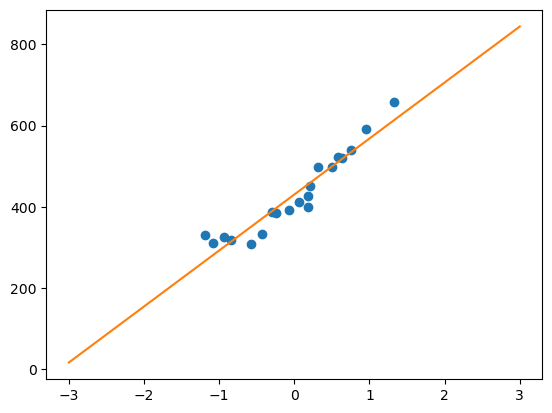

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#读入训练数据
train = np.loadtxt('click.csv',delimiter = ',',skiprows = 1)
train_x = train[:,0]
train_y = train[:,1]

#绘图
train_z = standarize(train_x)
plt.plot(train_x,train_y,"o")
plt.show()

#参数初始化
theta0 = np.random.rand() 
theta1 = np.random.rand() 
#预测函数
def f(x):
    return theta0 + theta1 * x

#目标函数
def E(x,y):
    return 0.5 * np.sum((y-f(x)) ** 2)

#标准化
mu = train_x.mean()
sigma = train_y.std()
def standarize(x):
    return (x-mu) / sigma




#学习率
ETA = 1e-3

#误差的差值
diff = 1

#更新次数
count = 0

error = E(train_z,train_y)
while diff > 1e-2:
    #更新结果保存到临时变量
    tmp0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    #更新参数
    theta0 = tmp0
    theta1 = tmp1

    #计算与上一次误差的差值
    current_error = E(train_z,train_y)
    diff = error - current_error
    error = current_error

    #输出日志
    count += 1
    log = '第{}次 ： theta0 = {:.3f}, theta1 = {:.3f}, 差值 = {:.4f}'
    print(log.format(count,theta0,theta1,diff))

#绘图确认
x = np.linspace(-3,3,100)
plt.plot(train_z,train_y,'o')
plt.plot(x,f(x))
plt.show()